In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
from src import *
from notebooks.seqevents import Events

### On eyedea dataset

In [17]:
uuid = '010_eyedea_all_aligned_RX100/1'
model, config = load_model_locally(uuid, model_name='rvce')

In [29]:
# file = config.testing_files[6]
file = '23_KeZlatnikum_iphone_aligned_RX100'
# file = '23_KeZlatnikum_RX100'
video = Video(file, config)
from_time, till_time = video.get_from_till_time(Part.WHOLE)
probs_1 = validate_video(video, model, return_preds=False, from_time=from_time, till_time=till_time)
probs_2 = validate_video(video, model, return_preds=False, from_time=config.window_length / 2, till_time=till_time)

In [30]:
n_events = 17

Px1 = probs_1['n_counts'][:, :n_events].T
Px2 = probs_2['n_counts'][:, :n_events].T

Pc = np.empty((Px1.shape[0], Px1.shape[1] + Px2.shape[1]))
Pc[:, 0::2] = Px1
Pc[:, 1::2] = Px2

Pc = Pc / Pc.sum(0)

print(Pc.shape)

(17, 455)


In [27]:
for n_epochs in [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]:
    n_events, seq_len = Pc.shape
    A = Events(n_events // 2, seq_len + 1)
    est_Px, est_Pc, kl_hist = A.deconv(Pc, n_epochs)

    labels = get_labels(video, from_time=from_time, till_time=till_time)
    n_counts_true = labels['n_counts']
    n_counts_true_cumsum = n_counts_true.cumsum()

    n_counts_true_sum = n_counts_true.sum()
    print(f'Px1:    {Px1.argmax(0).sum()}, {abs(n_counts_true_sum - Px1.argmax(0).sum())}') 
    print(f'Px2:    {Px2.argmax(0).sum()}, {abs(n_counts_true_sum - Px2.argmax(0).sum())}') 
    print(f'est_Px: {est_Px.argmax(0).sum()}, {abs(n_counts_true_sum - est_Px.argmax(0).sum())}')
    print(f'true:   {n_counts_true_sum}')

100%|██████████| 10/10 [00:02<00:00,  4.57it/s]


Px1:    175, 19
Px2:    172, 16
est_Px: 171, 15
true:   156


100%|██████████| 20/20 [00:04<00:00,  4.42it/s]


Px1:    175, 19
Px2:    172, 16
est_Px: 173, 17
true:   156


100%|██████████| 30/30 [00:06<00:00,  4.35it/s]


Px1:    175, 19
Px2:    172, 16
est_Px: 174, 18
true:   156


100%|██████████| 40/40 [00:08<00:00,  4.54it/s]


Px1:    175, 19
Px2:    172, 16
est_Px: 172, 16
true:   156


100%|██████████| 50/50 [00:11<00:00,  4.49it/s]


Px1:    175, 19
Px2:    172, 16
est_Px: 172, 16
true:   156


100%|██████████| 60/60 [00:13<00:00,  4.50it/s]


Px1:    175, 19
Px2:    172, 16
est_Px: 172, 16
true:   156


100%|██████████| 70/70 [00:15<00:00,  4.53it/s]


Px1:    175, 19
Px2:    172, 16
est_Px: 172, 16
true:   156


100%|██████████| 80/80 [00:18<00:00,  4.32it/s]


Px1:    175, 19
Px2:    172, 16
est_Px: 172, 16
true:   156


100%|██████████| 90/90 [00:19<00:00,  4.51it/s]


Px1:    175, 19
Px2:    172, 16
est_Px: 172, 16
true:   156


100%|██████████| 100/100 [00:22<00:00,  4.53it/s]


Px1:    175, 19
Px2:    172, 16
est_Px: 172, 16
true:   156


In [31]:
n_events, seq_len = Pc.shape
A = Events(n_events // 2, seq_len + 1)
est_Px, est_Pc, kl_hist = A.deconv(Pc, 50)

labels = get_labels(video, from_time=from_time, till_time=till_time)
n_counts_true = labels['n_counts']
n_counts_true_cumsum = n_counts_true.cumsum()

print(f'Px1:    {Px1.argmax(0).sum()}') 
print(f'Px2:    {Px2.argmax(0).sum()}') 
print(f'est_Px: {est_Px.argmax(0).sum()}')
print(f'true:   {n_counts_true.sum()}')

100%|██████████| 50/50 [00:10<00:00,  4.56it/s]


Px1:    220
Px2:    232
est_Px: 209
true:   156


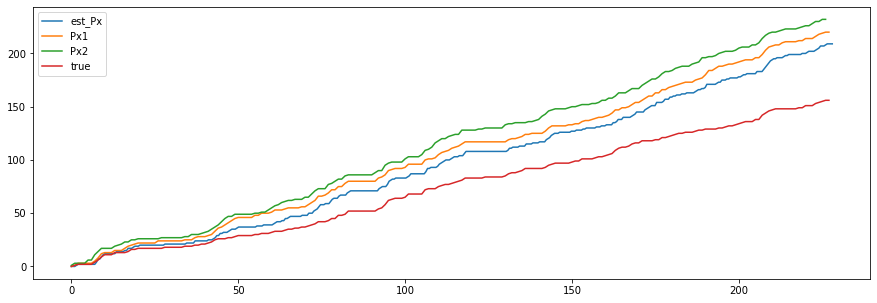

In [32]:
Px1_cumsum = Px1.argmax(0).cumsum()
Px2_cumsum = Px2.argmax(0).cumsum()
est_Px_cumsum = est_Px.argmax(0).cumsum()

x_axis = np.linspace(0, Px1.shape[1] , est_Px.shape[1])

plt.figure(figsize=(15, 5))
plt.plot(x_axis, est_Px_cumsum, label='est_Px')
plt.plot(Px1_cumsum, label='Px1')
plt.plot(Px2_cumsum, label='Px2')
plt.plot(n_counts_true_cumsum, label='true')
plt.legend();